In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\derek\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
csv_path = Path('SMA_Analysis/Stocks/BAC.csv')
bac_df=pd.read_csv(csv_path)
bac_df = bac_df.set_index(pd.DatetimeIndex(bac_df['Date'].values))
bac_df['daily_return'] = bac_df['Close'].dropna().pct_change()
bac_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return
2016-01-21,2016-01-21,12.389099,12.543169,12.008453,12.108146,188976000,0.0,0,NaN
2016-01-22,2016-01-22,12.370972,12.434413,12.207839,12.289406,169999800,0.0,0,0.014970
2016-01-25,2016-01-25,12.271279,12.280343,11.727500,11.745626,186419100,0.0,0,-0.044248
2016-01-26,2016-01-26,11.845318,12.099082,11.818129,12.062830,124246900,0.0,0,0.027006
2016-01-27,2016-01-27,11.963138,12.443476,11.954075,12.108146,124095800,0.0,0,0.003757


In [3]:
#Calculate MACD and Signal line indicators
#Calcualte short term exponential moving average (EMA)
ShortEMA = bac_df.Close.ewm(span=12, adjust=False).mean()
#Calculate the long term EMA
LongEMA = bac_df.Close.ewm(span=26, adjust=False).mean()
#Calculate MACD
MACD = ShortEMA - LongEMA
#calculate signal line
signal = MACD.ewm(span=9, adjust=False).mean()
#create new columns for data
bac_df['ShortEMA'] = ShortEMA
bac_df['LongEMA'] = LongEMA
bac_df['MACD'] = MACD
bac_df['Signal Line'] = signal
#show the data
bac_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,ShortEMA,LongEMA,MACD,Signal Line
2016-01-21,2016-01-21,12.389099,12.543169,12.008453,12.108146,188976000,0.0,0,NaN,12.108146,12.108146,0.000000,0.000000
2016-01-22,2016-01-22,12.370972,12.434413,12.207839,12.289406,169999800,0.0,0,0.014970,12.136032,12.121572,0.014459,0.002892
2016-01-25,2016-01-25,12.271279,12.280343,11.727500,11.745626,186419100,0.0,0,-0.044248,12.075970,12.093725,-0.017755,-0.001237
2016-01-26,2016-01-26,11.845318,12.099082,11.818129,12.062830,124246900,0.0,0,0.027006,12.073948,12.091436,-0.017488,-0.004488
2016-01-27,2016-01-27,11.963138,12.443476,11.954075,12.108146,124095800,0.0,0,0.003757,12.079209,12.092674,-0.013465,-0.006283


In [4]:
#Calculate RS and RSI
#Get difference in price
delta = bac_df['Close'].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()

up[up<0]=0
down[down>0] = 0

#get time period
period = 14 
#calculate avg gain and average loss
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

#calculate Relative Strength (RS)
RS = AVG_Gain / AVG_Loss

#calcvulate the RSI
RSI = 100.0 - (100.0 / (1.0 +RS))

#create new columns for data
bac_df['RSI'] = RSI
bac_df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,ShortEMA,LongEMA,MACD,Signal Line,RSI
2016-01-21,2016-01-21,12.389099,12.543169,12.008453,12.108146,188976000,0.0,0,NaN,12.108146,12.108146,0.000000,0.000000,NaN
2016-01-22,2016-01-22,12.370972,12.434413,12.207839,12.289406,169999800,0.0,0,0.014970,12.136032,12.121572,0.014459,0.002892,NaN
2016-01-25,2016-01-25,12.271279,12.280343,11.727500,11.745626,186419100,0.0,0,-0.044248,12.075970,12.093725,-0.017755,-0.001237,NaN
2016-01-26,2016-01-26,11.845318,12.099082,11.818129,12.062830,124246900,0.0,0,0.027006,12.073948,12.091436,-0.017488,-0.004488,NaN
2016-01-27,2016-01-27,11.963138,12.443476,11.954075,12.108146,124095800,0.0,0,0.003757,12.079209,12.092674,-0.013465,-0.006283,NaN


In [5]:
#create Momentum Indicator
span=10
Close = bac_df["Close"]

#create 10 day exponential moving average 
sma = Close.rolling(window=span, min_periods=span).mean()[:10]
rest = Close[10:]
TD = pd.concat([sma, rest]).ewm(span=span, adjust=False).mean()

MOMENTUM_A = 100 * (Close/TD)
bac_df['MOMENTUM_A'] = MOMENTUM_A
bac_df.head(25)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,ShortEMA,LongEMA,MACD,Signal Line,RSI,MOMENTUM_A
2016-01-21,2016-01-21,12.389099,12.543169,12.008453,12.108146,188976000,0.0,0,NaN,12.108146,12.108146,0.000000,0.000000,NaN,NaN
2016-01-22,2016-01-22,12.370972,12.434413,12.207839,12.289406,169999800,0.0,0,0.014970,12.136032,12.121572,0.014459,0.002892,NaN,NaN
2016-01-25,2016-01-25,12.271279,12.280343,11.727500,11.745626,186419100,0.0,0,-0.044248,12.075970,12.093725,-0.017755,-0.001237,NaN,NaN
2016-01-26,2016-01-26,11.845318,12.099082,11.818129,12.062830,124246900,0.0,0,0.027006,12.073948,12.091436,-0.017488,-0.004488,NaN,NaN
2016-01-27,2016-01-27,11.963138,12.443476,11.954075,12.108146,124095800,0.0,0,0.003757,12.079209,12.092674,-0.013465,-0.006283,NaN,NaN
2016-01-28,2016-01-28,12.316595,12.425351,12.017516,12.262217,110996200,0.0,0,0.012725,12.107364,12.105233,0.002132,-0.004600,NaN,NaN
2016-01-29,2016-01-29,12.380034,12.824120,12.316594,12.815058,159984100,0.0,0,0.045085,12.216240,12.157812,0.058428,0.008006,NaN,NaN
2016-02-01,2016-02-01,12.733490,12.769742,12.506916,12.651923,105739400,0.0,0,-0.012730,12.283268,12.194413,0.088855,0.024175,NaN,NaN
2016-02-02,2016-02-02,12.452538,12.461601,11.899697,11.990326,147101200,0.0,0,-0.052292,12.238200,12.179295,0.058905,0.031121,NaN,NaN
2016-02-03,2016-02-03,12.035642,12.044706,11.346856,11.809068,257664600,0.0,0,-0.015117,12.172180,12.151871,0.020309,0.028959,NaN,96.920565


In [6]:
# Construct a crossover trading signal for MACD
bac_df['crossover_long'] = np.where(bac_df['MACD'] > bac_df['Signal Line'], 1.0, 0.0)
bac_df['crossover_short'] = np.where(bac_df['MACD'] < bac_df['Signal Line'], -1.0, 0.0)
bac_df['MACD_Signal'] = bac_df['crossover_long'] + bac_df['crossover_short']


# Construct crossover trading signal for RSI
bac_df['oversold'] = np.where(bac_df['RSI'] < 30, 1.0, 0.0)
bac_df['overbought'] = np.where(bac_df['RSI'] > 70, -1.0, 0.0)
bac_df['RSI_Signal'] = bac_df['oversold'] + bac_df['overbought']

# Construct crossover trading signal for Momentum
bac_df['momentum_buy'] = np.where(bac_df['MOMENTUM_A'] > 100, 1.0, 0.0)
bac_df['momentum_sell'] = np.where(bac_df['MOMENTUM_A'] < 100, -1.0, 0.0)
bac_df['momentum_signal'] = bac_df['momentum_buy'] + bac_df['momentum_sell']

bac_df.head(25)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,ShortEMA,...,MOMENTUM_A,crossover_long,crossover_short,MACD_Signal,oversold,overbought,RSI_Signal,momentum_buy,momentum_sell,momentum_signal
2016-01-21,2016-01-21,12.389099,12.543169,12.008453,12.108146,188976000,0.0,0,NaN,12.108146,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-22,2016-01-22,12.370972,12.434413,12.207839,12.289406,169999800,0.0,0,0.014970,12.136032,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-25,2016-01-25,12.271279,12.280343,11.727500,11.745626,186419100,0.0,0,-0.044248,12.075970,...,NaN,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-26,2016-01-26,11.845318,12.099082,11.818129,12.062830,124246900,0.0,0,0.027006,12.073948,...,NaN,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-27,2016-01-27,11.963138,12.443476,11.954075,12.108146,124095800,0.0,0,0.003757,12.079209,...,NaN,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-28,2016-01-28,12.316595,12.425351,12.017516,12.262217,110996200,0.0,0,0.012725,12.107364,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-29,2016-01-29,12.380034,12.824120,12.316594,12.815058,159984100,0.0,0,0.045085,12.216240,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-01,2016-02-01,12.733490,12.769742,12.506916,12.651923,105739400,0.0,0,-0.012730,12.283268,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-02,2016-02-02,12.452538,12.461601,11.899697,11.990326,147101200,0.0,0,-0.052292,12.238200,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-03,2016-02-03,12.035642,12.044706,11.346856,11.809068,257664600,0.0,0,-0.015117,12.172180,...,96.920565,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,-1.0


In [7]:
 # Set x variable list of features
x_var_list = ['MACD_Signal', 'RSI_Signal','momentum_signal']
bac_df[x_var_list].head()

,MACD_Signal,RSI_Signal,momentum_signal
2016-01-21,0.0,0.0,0.0
2016-01-22,1.0,0.0,0.0
2016-01-25,-1.0,0.0,0.0
2016-01-26,-1.0,0.0,0.0
2016-01-27,-1.0,0.0,0.0


In [8]:
bac_df[x_var_list] = bac_df[x_var_list].shift(1)
bac_df[x_var_list].head()

,MACD_Signal,RSI_Signal,momentum_signal
2016-01-21,NaN,NaN,NaN
2016-01-22,0.0,0.0,0.0
2016-01-25,1.0,0.0,0.0
2016-01-26,-1.0,0.0,0.0
2016-01-27,-1.0,0.0,0.0


In [9]:
# Drop NAs and replace positive/negative infinity values
bac_df.dropna(subset=x_var_list, inplace=True)
bac_df.dropna(subset=['daily_return'], inplace=True)
bac_df = bac_df.replace([np.inf, -np.inf], np.nan)
bac_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,ShortEMA,...,MOMENTUM_A,crossover_long,crossover_short,MACD_Signal,oversold,overbought,RSI_Signal,momentum_buy,momentum_sell,momentum_signal
2016-01-22,2016-01-22,12.370972,12.434413,12.207839,12.289406,169999800,0.0,0,0.014970,12.136032,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-25,2016-01-25,12.271279,12.280343,11.727500,11.745626,186419100,0.0,0,-0.044248,12.075970,...,NaN,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-26,2016-01-26,11.845318,12.099082,11.818129,12.062830,124246900,0.0,0,0.027006,12.073948,...,NaN,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-27,2016-01-27,11.963138,12.443476,11.954075,12.108146,124095800,0.0,0,0.003757,12.079209,...,NaN,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-28,2016-01-28,12.316595,12.425351,12.017516,12.262217,110996200,0.0,0,0.012725,12.107364,...,NaN,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Construct the dependent variable where if daily return is greater than 0, then 1, else, 0.
bac_df['Positive Return'] = np.where(bac_df['daily_return'] > 0, 1.0, 0.0)
bac_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,ShortEMA,...,crossover_long,crossover_short,MACD_Signal,oversold,overbought,RSI_Signal,momentum_buy,momentum_sell,momentum_signal,Positive Return
2016-01-22,2016-01-22,12.370972,12.434413,12.207839,12.289406,169999800,0.0,0,0.014970,12.136032,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2016-01-25,2016-01-25,12.271279,12.280343,11.727500,11.745626,186419100,0.0,0,-0.044248,12.075970,...,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-26,2016-01-26,11.845318,12.099082,11.818129,12.062830,124246900,0.0,0,0.027006,12.073948,...,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2016-01-27,2016-01-27,11.963138,12.443476,11.954075,12.108146,124095800,0.0,0,0.003757,12.079209,...,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2016-01-28,2016-01-28,12.316595,12.425351,12.017516,12.262217,110996200,0.0,0,0.012725,12.107364,...,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
# Construct training start and end dates
training_start = bac_df.index.min().strftime(format= '%Y-%m-%d')
training_end = '2019-12-31'

# Construct testing start and end dates
testing_start =  '2020-01-01'
testing_end = bac_df.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2016-01-22
Training End: 2019-12-31
Testing Start: 2020-01-01
Testing End: 2021-01-20


In [12]:
X_train = bac_df[x_var_list][training_start:training_end]
y_train = bac_df['Positive Return'][training_start:training_end]

X_train.head()

,MACD_Signal,RSI_Signal,momentum_signal
2016-01-22,0.0,0.0,0.0
2016-01-25,1.0,0.0,0.0
2016-01-26,-1.0,0.0,0.0
2016-01-27,-1.0,0.0,0.0
2016-01-28,-1.0,0.0,0.0


In [13]:
y_train.head()

2016-01-22    1.0
2016-01-25    0.0
2016-01-26    1.0
2016-01-27    1.0
2016-01-28    1.0
Name: Positive Return, dtype: float64

In [14]:
# Construct the X test and y test datasets
X_test = bac_df[x_var_list][testing_start:testing_end]
y_test = bac_df['Positive Return'][testing_start:testing_end]
X_test.head()

,MACD_Signal,RSI_Signal,momentum_signal
2020-01-02,-1.0,-1.0,1.0
2020-01-03,-1.0,-1.0,1.0
2020-01-06,-1.0,0.0,-1.0
2020-01-07,-1.0,0.0,-1.0
2020-01-08,-1.0,0.0,-1.0


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [16]:
 # Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Make a prediction of "y" values from the X_test dataset
Predictions = model.predict(X_test)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = Predictions
Results.head()

,Positive Return,Predicted Value
2020-01-02,1.0,0.0
2020-01-03,0.0,0.0
2020-01-06,0.0,1.0
2020-01-07,0.0,1.0
2020-01-08,1.0,1.0


In [17]:
X_train.head(25)

,MACD_Signal,RSI_Signal,momentum_signal
2016-01-22,0.0,0.0,0.0
2016-01-25,1.0,0.0,0.0
2016-01-26,-1.0,0.0,0.0
2016-01-27,-1.0,0.0,0.0
2016-01-28,-1.0,0.0,0.0
2016-01-29,1.0,0.0,0.0
2016-02-01,1.0,0.0,0.0
2016-02-02,1.0,0.0,0.0
2016-02-03,1.0,0.0,0.0
2016-02-04,-1.0,0.0,-1.0


In [18]:
y_train.head(25)

2016-01-22    1.0
2016-01-25    0.0
2016-01-26    1.0
2016-01-27    1.0
2016-01-28    1.0
2016-01-29    1.0
2016-02-01    0.0
2016-02-02    0.0
2016-02-03    0.0
2016-02-04    1.0
2016-02-05    0.0
2016-02-08    0.0
2016-02-09    0.0
2016-02-10    0.0
2016-02-11    0.0
2016-02-12    1.0
2016-02-16    1.0
2016-02-17    1.0
2016-02-18    0.0
2016-02-19    0.0
2016-02-22    1.0
2016-02-23    0.0
2016-02-24    0.0
2016-02-25    1.0
2016-02-26    1.0
Name: Positive Return, dtype: float64

In [19]:
# Save the pre-trained model
from joblib import dump, load
dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [20]:
model = load('random_forest_model.joblib')
predictions = model.predict(X_test)
predictions

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [21]:
Results['Predicted Value'] = predictions
Results

,Positive Return,Predicted Value
2020-01-02,1.0,0.0
2020-01-03,0.0,0.0
2020-01-06,0.0,1.0
2020-01-07,0.0,1.0
2020-01-08,1.0,1.0
2020-01-09,1.0,1.0
2020-01-10,0.0,1.0
2020-01-13,1.0,1.0
2020-01-14,1.0,1.0
2020-01-15,0.0,1.0


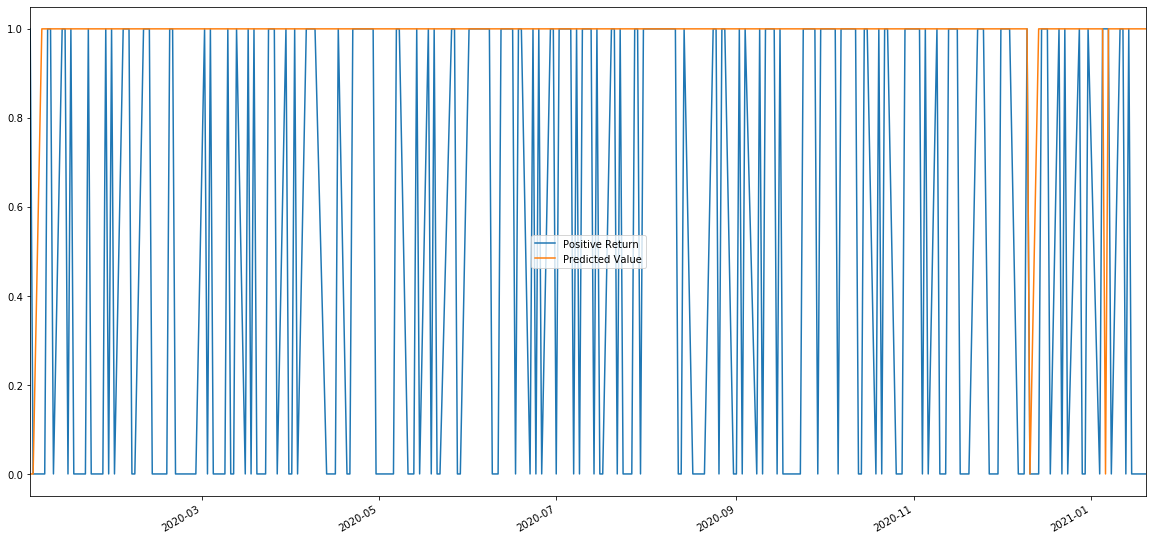

In [22]:
# Plot predicted results vs. actual results
Results[['Positive Return', 'Predicted Value']].plot(figsize=(20,10))

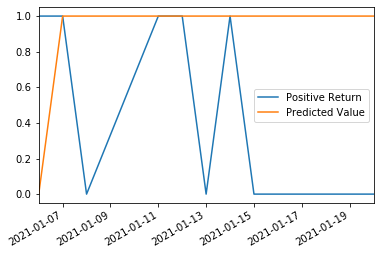

In [23]:
# Plot last 10 records of predicted vs. actual results
Results[['Positive Return', 'Predicted Value']].tail(10).plot()